# 1장 시계열의 특징

다른 시점에서 관측된 실험 데이터를 분석하는 것은 통계적 모델링 및 추론에서 새로운 문제가 되고 있습니다. 시간 상에서 인접한 점들을 샘플링 하면 명백한 상관관계가 확인되는데, 이는 기존의 통계적 방법들이 인접 점들이 IID라고 가정한다는 점에서 어려움이 발생합니다. 시간 상에 상관관계를 갖는 문제에 대한 수학적, 통계적 해답을 찾는 방법을 시계열분석이라고 합니다.

중요한 시계열 문제들이 발생하는 다양한 분야에서 시계열분석의 영향을 확인할 수 있습니다. 예를들어, 경제학 분야에서는 많은 친숙한 시계열 정보가 발생합니다. 사회학자들은 출생률 또는 진학률과 같은 인구 시계열을 조사합니다. 임상역학자들은 특정 시간 주기 동안 관측되는 인플루엔자 원인의 수에 관심이 있을 것입니다. 약학 분야에서는, 고혈압 치료에 사용되는 약을 평가하는데 있어 시간에 따른 혈압 측정 값이 유용하게 사용될 수 있습니다. 뇌파의 자기 공명 시계열 정보는 다양한 실험 조건에서 특정 자극에 뇌가 어떻게 반응하는지 연구하는데 사용될 수 있습니다.

우리의 시각에서 보면, 시계열 정보를 조사하는 첫번째 단계는 시간에 따른 그래프 기록을 유심히 확인해 보는 것입니다. 이러한 면밀한 조사를 통해 종종 해석의 방법을 발견해내기도 하며 데이터의 정보를 요약하는데 사용될 통계적 방법을 발견해내기도 합니다. 특정 통계적 방법을 면밀히 살펴보기 전에, 2개의 별개인 (하지만 완전히 배타적이지는 않은) 시계열분석에 대한 접근법을 언급하고자 합니다. 이는 시간 영역 접근법과 주파수 영역 접근법 입니다. 시간 영역 접근법은 지연된 관계에 대한 조사를 가장 중요하게 여깁니다. (예를들어 오늘 일어난 일이 내일 발생할 일에 어떻게 영향을 미칠지) 반면, 주파수 영역 접근법은 추기에 대한 조사를 가장 중요하게 여깁니다. (예를들어 경기 부양 또는 후퇴의 주기) 우리는 다음 장들에서 이 2가지 접근법들을 알아볼 것입니다.

## 1.1 시계열 데이터의 성질

다양한 분야에서 시계열분석가들의 관심사항 및 의문사항들이 발생할 수 있습니다. 다음의 경우들은 일반적인 시계열 실험 데이터 들이며, 그 데이터들에 대해 발생할 수 있는 통계적 의문점들을 기술합니다.

### 예 1.1 Johnson & Johnson의 분기별 소득

그림 1.1은 미국 회사인 존슨&존슨의 분기별 소득을 보여줍니다. 1960년의 1분기부터 1980년의 4분기까지 84개 분기(21 년) 데이터가 측정되었습니다. 이러한 시계열 데이터에 대한 모델링은 시간이력 상의 주요한 패턴을 관찰하는 것으로 시작합니다. 이 경우, 추세에 따라 점진적으로 증가하는 양상이 보이며, 추세에 대한 변화는 매 주기 반복되는 것을 볼 수 있습니다. 이러한 형태의 데이터를 분석하는 방법은 2장 및 6장에서 알아볼 것입니다.

In [1]:
library(astsa)

Warning message:
"package 'astsa' was built under R version 3.6.3"

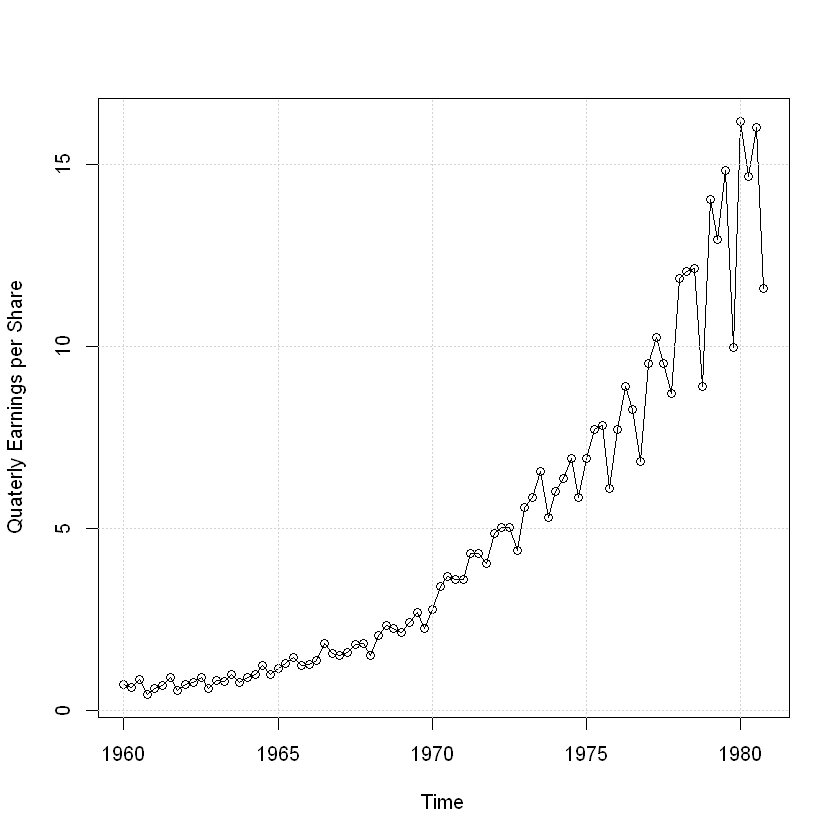

In [2]:
plot(jj, type="o", ylab="Quaterly Earnings per Share")
grid()

### 예 1.2 지구 온난화

그림 1.2의 세계 온도 이력을 고려해 봅시다. 이 데이터는 세계 대륙-해양 평균 온도이며 1880년에서 2015년 까지 측정되었습니다. 지구 온난화에 대한 논의가 생긴 20세기 후반부터 온도가 상승하는 경향을 볼 수 있습니다. 또한 1935년에 평평하고, 1970년에 급격한 상승 경향을 보입니다. 지구 온난화 옹호자 및 반대자들의 관심사항은 전반적인 경향이 자연적인 것인지 인간에 의한 것인지입니다. 문제 2.8은 634년 간의 빙하 침전 데이터를 조사하며 이는 장기적인 온도 경향을 대표할 수있는 데이터 입니다. 온도에 대한 변화율은 100년 주기 동안 이상하지는 않습니다. 경향에 대한 판단은 특정주기에 국한되지 않습니다. 이 예제에 대한 R 코드는 예 1.1과 유사합니다.

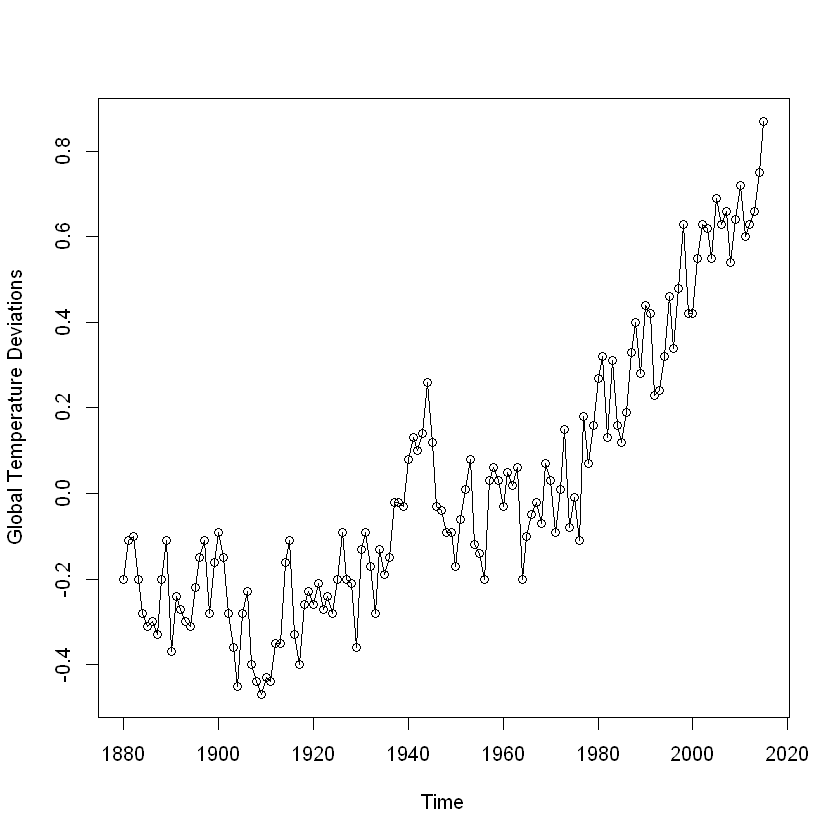

In [3]:
plot(globtemp, type="o", ylab="Global Temperature Deviations")

### 예 1.3 음성 데이터

그림 1.3은 '아'라고 한 음성에 대한 0.1초 (1000 개 포인트) 동안의 기록을 보여줍니다. 신호에는 반복성이 있고 주기성이 보입니다. 현재 관심이 많은 문제 중 하나는 컴퓨터가 음성을 인식하는 것이며 이는 특성 신호를 '아'라는 문구로 변경하는 것을 의미합니다. 스펙트럼 분석을 사용하여 다양한 음성 신호와 문구를 맞춰나갈 수 있습니다. 작은 wavelet들이 반복되는 것을 확인할 수 있습니다. 묶음(packet)들이 분리되는 것을 피치 주기(pitch period)라고 하며 성대(glottis)가 열리도 닫힘에 따른 주기적 신호에 대한 응답으로 볼 수 있습니다. R에서 그림1.3은 아래와 같이 그립니다.

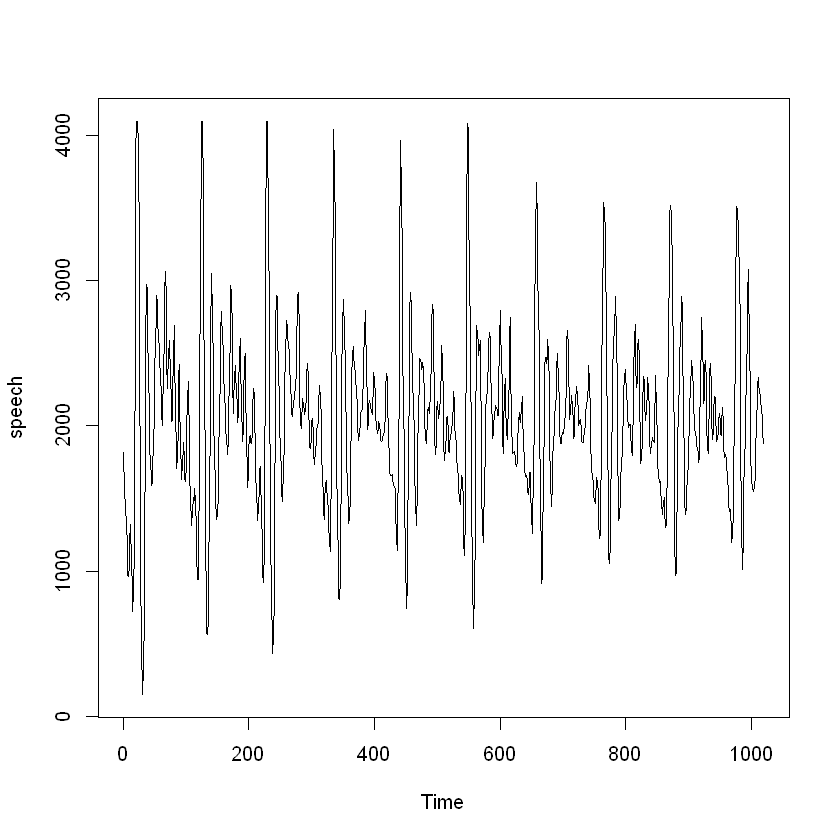

In [4]:
plot(speech)

### 예 1.4 다우존스 산업 평균

(중략)

## 1.2 시간이력 통계 모델

시계열 분석의 주된 목적은 샘플 데이터를 잘 설명하는 수학적 모델을 만드는 것입니다. 데이터가 무작위로 변동하는 특성을 모사하기 위해 우리는 랜덤변수의 집합이라고 가정합니다. 예를들어, 우리는 시간이력을 랜덤 변수들 $x_1, x_2, x_3, \dots, $로 고려할 수 있으며, 랜덤변수 $x_1$은 처음 시간에서 취득한 값, $x_2$는 두번째 시간 주기에서 취득한 값, $x_3$은 세번째 시간 주기에서 측정한 값 등으로 볼 수 있습니다. 일반적으로, 랜덤 변수들의 집합 $\{x_t\}$는 $t$로 구분하며 이는 확률과정(stochastic process)이라고 합니다. 이 책에서 $t$는 이산이고 정수 $t=0,\pm1,\pm2,\dots,$에 따라 달라진다고 고려할 것입니다. 확률 과정에서 관측된 값들은 확률과정의 현실화(realization)라고 합니다. 우리가 논의하는 이책에서는 명백하므로 시계열(시간이력)과 과정을 따로 구분하지 않겠습니다.